# MATH 245 – Computational Mathematics – Project 2 

## Niels Clayton 300437590

## Question 1


### Introduction
The purpose of this section is to investigate the bisection method of approximating the roots of a function. 


### Procedure
Write a function to use the Bisection method of approximating the root of $f(x)=0$ to a given tolerance of TOL, 
using a maximum of NMAX iterations.

The function $f(x)$ is given with a fixed interval, and it is assumed there is a root with within this interval. This 
interval is then bisected. If the midpoint is positive, then the root must be between the lower bound and the mid point. 
If the midpoint is negative then the root must be between the upper bound and the midpoint. Do this recursively, 
adjusting the bounds each iteration.



In [27]:
import numpy as np

func_1 = lambda x: np.log(x)+x      # Function to find the roots of

def bisection(a, b, func, x_n, tolerence, iterations, NMAX):
    
    c = (a+b)/2
    
    if np.abs(c - x_n) <= tolerence or iterations >= NMAX:
        return c
    
    if func(c) == 0:
        return c
    
    elif func(a)*func(c) < 0:
        return bisection(a, c, func, c, tolerence, iterations+1, NMAX)
        
    else:
        return bisection(c, b, func, c, tolerence, iterations+1, NMAX)

func_1 = lambda x: np.log10(x)+x
TOL = 1e-6  
NMAX = 1e3

print(bisection(0.1, 1, func_1, 0, TOL, 0, NMAX))



0.3990126609802246


### Observations and discussion

the system converges on the root.







## Question 2
 

### Introduction
The purpose of this section is to investigate the Newton method of approximating the roots of a function. 


### Procedure
Write a function to use the Newton method of approximating the root of $f(x)=0$ to a given tolerance of TOL, 
using a maximum of NMAX iterations.

Newtons method requires $f(x)$ and $f'(x)$. The x intersection of the derivative $f'(x)$ is then calculated, and this new 
x value is input as the new guess for the method.



In [28]:
func_1 = lambda x: np.log10(x)+x      # Function to find the roots of
derivative = lambda x: 1/x + 1      # Derivative of func_1

def Newton(func, derivative, guess, tolerence, iteration, NMAX):
    x = guess - (func_1(guess)/derivative(guess))
    
    #print("n = {} | x_n = {:.5f} | f(x_n) = {:.5f} | error = {:.5f}".format(iteration, guess, func_1(guess), np.abs(x-guess)))
    
    if np.abs(x-guess) <= tolerence or iteration >= NMAX:
        return x
    
    else:
        return Newton(func, derivative, x, tolerence, iteration+1, NMAX)

NMAX = 1e3
TOL = 1e-6
print(Newton(func_1, derivative, 0.4, TOL, 0, NMAX))


0.3990132627323363


### Observations and discussion

The system converges on the root.





## Question 3


### Introduction

The purpose of this section is to investigate the differences in time and accuracy of my own bisection and Newton methods
compared to the build in functions in the library.

### Procedure

3. (a)

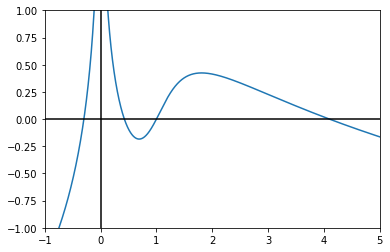

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci


func_1 = lambda x: np.arctan((2*(x-1))) - np.log(np.abs(x))

x = np.arange(-1.0, 5.0, 0.001)
y = []

for i in x:
    y.append(func_1(i))

plt.plot(x,y)
plt.axis([-1, 5, -1, 1])
plt.axhline(0,color='black') 
plt.axvline(0,color='black') 
plt.show()


3. (c) and (d)


In [30]:
from time import time
import  scipy.optimize as sci
TOL = 1e-6  
NMAX = 1e3

func_1 = lambda x: np.arctan((2*(x-1))) - np.log(np.abs(x))      # Function to find the roots of
derivative = lambda x: (2 / (4*(np.power(x-1, 2))+1)) - 1/x      # Derivative of func_1

def bisec(a,b):
    t_1 = time()
    root = bisection(a,b,func_1, 0, TOL, 0, NMAX)
    t_2 = time()
    print("Root calculated with own method:     {} | Time taken: {}".format(root, (t_2-t_1)))
    t_1 = time()
    root = sci.bisect(func_1, a, b)
    t_2 = time()
    print("Root calculated with Library method: {} | Time taken: {}".format(root, (t_2-t_1)))
    print("\n")
    
def newt(a):
    t_1 = time()
    root = Newton(func_1, derivative, a, TOL , 0, NMAX)
    t_2 = time()
    print("Root calculated with own method:     {} | Time taken: {}".format(root, (t_2-t_1)))
    t_1 = time()
    root = sci.newton(func_1, a, derivative)
    t_2 = time()
    print("Root calculated with Library method: {} | Time taken: {}".format(root, (t_2-t_1)))
    print("\n")

print("Bisection:\n")
bisec(-0.4, 0.2) 
bisec(0.3, 0.5)
bisec(0.8, 1.1)
bisec(3, 5)
print("Newton's:\n")
newt(-0.1)
newt(0.1)
newt(0.9)
newt(4)
print("Calculated with fsolve:\n")
print(sci.fsolve(func_1, -0.1))
print(sci.fsolve(func_1, 0.1))
print(sci.fsolve(func_1, 0.9))
print(sci.fsolve(func_1, 4))


Bisection:

Root calculated with own method:     -0.30009708404541013 | Time taken: 0.000286102294921875
Root calculated with Library method: -0.3000975659972027 | Time taken: 0.00014519691467285156


Root calculated with own method:     0.4254112243652344 | Time taken: 0.000202178955078125
Root calculated with Library method: 0.42541157391824524 | Time taken: 0.00012946128845214844


Root calculated with own method:     0.9999998092651368 | Time taken: 0.00022077560424804688
Root calculated with Library method: 1.000000000000364 | Time taken: 0.00031757354736328125


Root calculated with own method:     4.09946346282959 | Time taken: 0.00031948089599609375
Root calculated with Library method: 4.09946288757601 | Time taken: 0.00016736984252929688


Newton's:

Root calculated with own method:     -0.300097565997022 | Time taken: 0.0001709461212158203
Root calculated with Library method: -0.3000975659970607 | Time taken: 0.0004937648773193359


Root calculated with own method:     0.4254

3. (e)


In [31]:
TOL = 1e-6
NMAX = 50

print("x_0 = -1:   {}".format(Newton(func_1, derivative, -1, TOL , 0, NMAX)))
print("x_0 = 0.65: {}".format(Newton(func_1, derivative, 0.65, TOL , 0, NMAX)))
print("x_0 = 0.7:  {}".format(Newton(func_1, derivative, 0.7, TOL , 0, NMAX)))
print("x_0 = 1.7:  {}".format(Newton(func_1, derivative, 1.7, TOL , 0, NMAX)))
print("x_0 = 1.8:  {}".format(Newton(func_1, derivative, 1.8, TOL , 0, NMAX)))
print("x_0 = 1.9:  {}".format(Newton(func_1, derivative, 1.9, TOL , 0, NMAX)))
print("x_0 = 5:    {}".format(Newton(func_1, derivative, 5, TOL , 0, NMAX)))
print("x_0 = 10:   {}".format(Newton(func_1, derivative, 10, TOL , 0, NMAX)))


x_0 = -1:   0.42541157391865503
x_0 = 0.65: -0.30009756599706067
x_0 = 0.7:  4.099462887574569
x_0 = 1.7:  4.099462887574569
x_0 = 1.8:  -4.602074230202898e+90
x_0 = 1.9:  -0.30009756599706067
x_0 = 5:    4.09946288757457
x_0 = 10:   -0.30009756599706067


### Observations

### 3. (a)


There are 3 changes in monotonicity of the course of $f(x)$ and 4 roots.

### 3. (c) and (d)

For the bisection method of approximating roots of a function, My function was both less efficient, and less accurate than
the bisection function within the library, sometimes only being accurate to 4 significant figures. 

For Newton's method my function and and the built in library function provided comparable results, however my function was 
still less slower and less efficient.  

### 3. (e) 

The only two roots that were converged on were -0.30009, and 4.09946, rather than the root that was closest to the initial guess. At the initial guess of $x_0 = 1.8$ the answer 'blew up'
and didnt converge.

### Discussion

### 3. (c) and (d)
I would assume that the lack in accuracy within my own bisection method is due to the tolerance value used when computing 
the roots not being small enough, allowing the function to terminate before an accurate answer is reached. 

I would assume that the speed discrepancy across both of my functions is due to the use of recursion in my own method. Recursion is highly inefficient, and causes there to be 
a new function call every iteration. 

### 3. (e)

The sequence only ever converges on the two before mentioned roots due to the fact that Newton's method works by taking a tangent to the curve
at a given point, and then finding the x-intercept of that tangent. If the gradient of the curve is small, then the x-intercept can overshoot 
the closest root, causing the sequence to converge on a different root. For the case of $x_0 = 1.8$ this is an inflection point on the curve 
with a gradient of 0, therefore there is no x-intercept, and the root is not found.




## Question 4

### Introduction
Approximate the roots of the function from question 3 using a hybrid Newton's 
method and bisection method to stop the overshoot that can come with newtons method.

### Procedure
Implement the function described in question 4

In [32]:
TOL = 1e-6
NMAX = 50
func_1 = lambda x: np.arctan((2*(x-1))) - np.log(np.abs(x))      # Function to find the roots of
derivative = lambda x: (2 / (4*(np.power(x-1, 2))+1)) - 1/x      # Derivative of func_1

def findzero(a,b,tolerence, NMAX, function, der):
    
    lower = a
    upper = b
    c = (upper+lower)/2
    
    if function(lower)*function(c) < 0:
        upper = c
    else:
        lower = c
    
    x_0 = abs(upper -lower)/2 
    for i in range (NMAX):
        
        x = x_0 - (function(x_0)/der(x_0))
        
        if x < lower or x > upper:
            x = (lower+upper)/2
        
        if function(x) ==0 or np.abs(x-x_0) <= tolerence:
            return x, i, 0
        
        elif function(lower)*function(x) <= 0:
            upper = x
        
        else:
            lower = x
        x_0 = x
    
    return x, NMAX, 2

a = findzero(-1, -0.1, TOL, NMAX, func_1, derivative)
b = findzero(0.1, 0.5, TOL, NMAX, func_1, derivative)
c = findzero(0.8, 1.1, TOL, NMAX, func_1, derivative)
d = findzero(3, 5, TOL, NMAX, func_1, derivative)

print("Root : {} | Iteration {}".format(a[0], a[1]))
print("Root : {} | Iteration {}".format(b[0], b[1]))
print("Root : {} | Iteration {}".format(c[0], c[1]))
print("Root : {} | Iteration {}".format(d[0], d[1]))


Root : -0.3000975659970607 | Iteration 4
Root : 0.425411573918655 | Iteration 4
Root : 1.0000000000000002 | Iteration 3
Root : 4.09946288757457 | Iteration 4


### Observations
By using this hybrid function, the series converges on the roots much faster.


### Discussion
This hybrid method will will always converge, assuming there is a root on the 
interval $[a,b]$. This is because when Newton's method causes the next x calculation
to outside the interval, the bisection method will become responsible for calculations.



## Question 5

### Introduction
Investigate the secant method of finding roots, and find the rate of convergence. 

### Procedure


In [33]:
func_1 = lambda x: (x**20)-1      # Function to find the roots of

def secant(func, guess_1, guess_2, tolerence, iteration, NMAX):
    x = guess_1 - ((guess_1-guess_2)/(func(guess_1)-func(guess_2)))*func(guess_1)
    if np.abs(x-guess_1) <= tolerence or iteration >= NMAX:
        return x
    
    
    else:
        
        return secant(func, x, guess_1, tolerence, iteration+1, NMAX)

NMAX = 1000
TOL = 1e-6
print(secant(func_1, 0.9, 1.4, TOL, 0, NMAX))


def rate(func, guess_1, guess_2, tolerence, NMAX):
    
    x = 0
    x_1 = guess_1
    x_2 = guess_2
    
    e1 = abs(x-x_1)
    e2 = e1
    e3 = e1
    
    for i in range(0,NMAX):
        x = x_1 - ((x_1-x_2)/(func(x_1)-func(x_2)))*func(x_1)
        e1 = e2
        e2 = e3
        e3 = np.abs(x-x_1)
        rate1 = np.log(e2/e3)/np.log(e1/e2)
        if i > 8:
            print(" the rate of convergence is {}".format(rate1))
        if np.abs(x-x_1) <= tolerence or i >= NMAX:
            return x
        
        else:
            x_2 = x_1
            x_1 = x
        
        
    return x

print(rate(func_1, 0.9, 1.5, TOL, NMAX))


1.0000000000004157
 the rate of convergence is 21.48589855213716
 the rate of convergence is -0.6426797082681942
 the rate of convergence is -0.3493551453953944
 the rate of convergence is 2.9792275226551053
 the rate of convergence is 0.5963827374591647
 the rate of convergence is 2.4026400226138436
 the rate of convergence is 1.5886950564021125
 the rate of convergence is 1.6019066507893551
1.0000000000019944


/home/niels/Desktop/Uni-Notes/Tri 2/MATH 245/garbage/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


### Observations
The secant method converges on the roots much faster with far fewer iterations


### Discussion
The convergence rate of this method when calculated is roughly 1.6, which is close to the expected rate 
of 1.62